In [1]:
# We must first import our relevant packages to this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We will use the requests package to call on APIs.
import requests
import time
# We will use the citipy package to generate a list of randomly selected cities.
from citipy import citipy

# We will use the getpass function to keep our API key hidden.
import getpass

In [2]:
# We will use the getpass function to define the API key we are using to make requests, while keeping it hidden.
api_key = getpass.getpass()

········


In [ ]:
# Output file (CSV)
output_data_file = "output_data/cities.csv"

In [3]:
# The cities_to_check variable will be a list containing randomly selected cities using the citipy package.
# Later we will make API requests to OpenWeatherMap and try to extract data related to each city.
# The citipy package may return cities, for which OpenWeatherMap has no data, hence, we are "checking" each city.
# Later we will define a new list containing only those cities, for which OpenWeatherMap does have data.
cities_to_check = []

In [4]:
# We will use the numpy and citipy packages to generate a list of randomly selected cities.
# We will first define two lists: one for latitude, and one for longitude.
# We will then use the zip function with these two lists to form coodinates pairs of latitude and longitude.
latitudes = np.random.uniform(low=-90.000, high=90.000, size=1500)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=1500)
latitudes_and_longitudes = zip(latitudes, longitudes)

# The citipy package will return the city closest to each coordinate pair.
# By using this method of returning cities in a for-loop, we will generate a list of cities.
for latitude_and_longitude in latitudes_and_longitudes:
    city = citipy.nearest_city(latitude_and_longitude[0], latitude_and_longitude[1]).city_name
    
    # We do not want to add the same city to our list more than once,
    # so we only append a city to our list if it is not already in the list.
    if city not in cities_to_check:
        cities_to_check.append(city)

# Here we print the len of the cities_to_check variable to confirm that we have a sufficient amount of cities.
len(cities_to_check)

642

In [5]:
# Using the requests package, we will be making calls to the OpenWeatherMap API.
# First we define the general URL variable,
# then we will be able to use this base URL, while defining other elements,
# such as which units to return numerical data in, and which city to check.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# This defines the more specific URL.
# It uses the general URL we defined earlier, and inserts our API key, the units we want our results in, and later in a for loop we will concatenate the specific city to the end of the URL.
query_url = f"{url}appid={api_key}&units=units&q="

In [6]:
# We are only allowed to make a limited amount of requests per a certain time restraint.
# Here we make a subset of our cities_to_check list containing only the first 50 cities.
# We will use this subset-list for testing purposes, and only use our full list once we are confident our code will work.
cities_to_check_subset_for_testing = cities_to_check[:50]

In [7]:
# latitudes = []
# temperatures = []
# found_cities = []

# print("Beginning Data Retrieval")

# for city in cities_to_check:
#     response = requests.get(query_url + city).json()
#     city_name = cities_to_check[cities_to_check.index(city)]
#     record_number = cities_to_check.index(city)
    
#     try:
#         print(f"Processing Record {record_number} of Set | {city_name}")
#         found_cities.append(city_name)
#         latitudes.append(response["coord"]["lat"])
#         temperatures.append(response["main"]["temp"])
        
#     except:
#         print ("City not found.  Skipping...")
        
# print("-----------------------------")
# print("Data Retrieval Complete")
# print("-----------------------------")



# This block of code serves the same purpose as the block of code above.
# The only difference is that we are using a subset of the entire list of cities for testing purposes.

# We will soon use the pandas package to create a dataframe containing information about each city in our list.
# Here initialize a list for everything related to the city we are interested in.
# When we are ready to make our dataframe, we will first define a dictionary containing each of these lists.
# The list of cities we generated earlier will most likely contain cities for which the OpenWeatherMap API has no data.
# Therefore these lists should be of shorter length than our full list of cities.
# We can only create a dataframe from a list of dictionaries if each list is the same length.
# Therefore, we define the city_names list to hold cities only for which data was found.
city_names = []
city_cloudinesses = []
city_countries = []
city_dates = []
city_humidities = []
city_latitudes = []
city_longitudes = []
city_max_temperatures = []
city_wind_speeds = []

print("Beginning Data Retrieval")

# In this for-loop, we begin by using the requests package to return a json file containing the data we are interested in for each city.
# Earlier, we checked the length of our cities_to_check list to confirm it is a sufficient amount.
# We will also determine the index for each city, so the user can see how many cities have been checked in real time.
for city in cities_to_check_subset_for_testing:
    response = requests.get(query_url + city).json()
    record_number = cities_to_check_subset_for_testing.index(city)
    
    # As stated before, the OpenWeatherMap API may not have data for every city in our list.
    # We must therefore use a try block and an except block.
    # This will ensure our program does not crash if the for-loop reaches a city for which the OpenWeatherMap API has no data.
    try:
        # By extracting the city name from the json file, the user can see which city the for-loop is currently testing, not only by index number, but by name.
        city_name = response["name"]
        print(f"Processing Record {record_number} of Set | {city_name}")
        city_names.append(response["name"])
        city_cloudinesses.append(response["clouds"]["all"])
        city_countries.append(response["sys"]["country"])
        city_dates.append(response["dt"])
        city_humidities.append(response["main"]["humidity"])
        city_latitudes.append(response["coord"]["lat"])
        city_longitudes.append(response["coord"]["lon"])
        city_max_temperatures.append(response["main"]["temp_max"])
        city_wind_speeds.append(response["wind"]["speed"])
        
    except:
        print ("City not found.  Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
Processing Record 0 of Set | Kapaa
Processing Record 1 of Set | Severo-Kurilsk
Processing Record 2 of Set | Avera
Processing Record 3 of Set | Saint George
Processing Record 4 of Set | Taltal
City not found.  Skipping...
Processing Record 6 of Set | Busselton
Processing Record 7 of Set | East London
Processing Record 8 of Set | Mataura
Processing Record 9 of Set | Tasiilaq
Processing Record 10 of Set | Cherskiy
Processing Record 11 of Set | Ostrovnoy
Processing Record 12 of Set | Yerbogachen
Processing Record 13 of Set | Baykit
Processing Record 14 of Set | Severo-Yeniseyskiy
Processing Record 15 of Set | Kodiak
Processing Record 16 of Set | Albany
Processing Record 17 of Set | Bambous Virieux
City not found.  Skipping...
Processing Record 19 of Set | Marsa Matruh
Processing Record 20 of Set | Vilcun
Processing Record 21 of Set | Coquimbo
Processing Record 22 of Set | Punta Arenas
City not found.  Skipping...
Processing Record 24 of Set | Rikitea
Processing Rec

In [8]:
# We will soon create a dataframe using the data we extracted earlier from the OpenWeatherMap API.
# Here we define a dictionary of the lists we defined in the for-loop that made calls to the API.
# We will use this dictionary for the data in our dataframe.
weather_data_dictionary = {
    "City": city_names,
    "Cloudiness": city_cloudinesses,
    "Country": city_countries,
    "Date": city_dates,
    "Humidity": city_humidities,
    "Latitude": city_latitudes,
    "Longitude": city_longitudes,
    "Max Temperature": city_max_temperatures,
    "Wind Speed": city_wind_speeds
}

In [9]:
# Here we create a dataframe using the dictionary of lists we defined earlier.
weather_data = pd.DataFrame(weather_data_dictionary)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Kapaa,90,US,1539107760,74,22.08,-159.32,299.250,7.70
1,Severo-Kurilsk,20,RU,1539111802,98,50.68,156.12,280.857,5.29
2,Avera,40,US,1539110100,62,33.19,-82.53,303.150,5.10
3,Saint George,20,GR,1539109200,77,39.45,22.34,288.150,1.00
4,Taltal,0,CL,1539111803,71,-25.41,-70.49,294.657,1.44


In [14]:
# After forming a dataframe using the weather data we extracted from the OpenWeatherMap API, we will make a csv file therefrom.
weather_data_csv = "Output/weather_data.csv"

# NOTE TO SELF: CONVERT MAX TEMPERATURE VALUES TO FAHRENHEIT

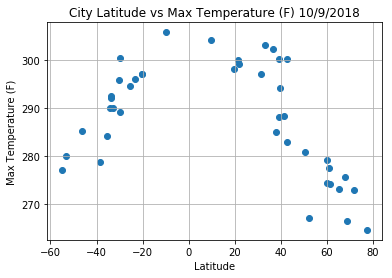

In [20]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"])
plt.title("City Latitude vs Max Temperature (F) 10/9/2018")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

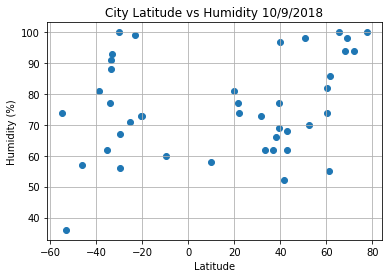

In [21]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"])
plt.title("City Latitude vs Humidity (%) 10/9/2018")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

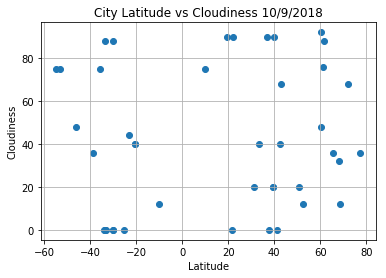

In [22]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"])
plt.title("City Latitude vs Cloudiness (%) 10/9/2018")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

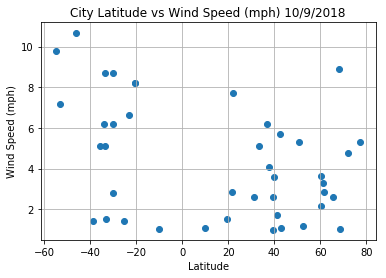

In [24]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"])
plt.title("City Latitude vs Wind Speed (mph) 10/9/2018")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()